Gözde Ünver 2018400309 \
Mehmet Gökay Yıldız 2017400072

## Q1 a)

For an input vector with dimension d: $x=\begin{bmatrix}x_{1} \\ x_{2} \\: \\ x_{d}\end{bmatrix}$, the weight vector is like this: $w^{*}=\begin{bmatrix}w_{1}\\w_{2}\\:\\w_{d}\end{bmatrix}$ and $b^{*}=b$.  
Additionally, $u=\begin{bmatrix} b^{*} \\ w^{*}\end{bmatrix}=\begin{bmatrix}b\\w_{1}\\w_{2}\\:\\ w_{d}\end{bmatrix}$ and $Q=\begin{bmatrix} 0&0_{d}^{T} \\ 0_{d}&I_{d}\end{bmatrix}$.
Then, $u^{T}Qu=[0\text{ }w_{1}\text{ }w_{2}\text{ }..\text{ }w_{d}]\begin{bmatrix}b\\w_{1}\\w_{2}\\:\\ w_{d}\end{bmatrix}=w_{1}^{2}+w_{2}^2+..+w_{d}^2$ which is certainly a non-negative number for any $w_{i}$ values that $i=1,..d$. 

From the definition of a positive semi-definiteness is that a matrix $Q$ is a positive semi-definite if $u^{T}Qu \geq 0$. We showed above that $u^{T}Qu$ is non-negative for any $u$ thus, $Q$ is a positive semi-definite matrix.

## Q1 b)

Our objective is: \
$min_{b,w}\text{ }$  $\frac{1}{2}w^{T}w$ \
$s.t.\text{ }$  $y_{n}(w^{T}x_{n}+b)\geq 1$  $for \text{ }n=1,2...N$ \
for $x=\begin{bmatrix} 0&0 \\ 0&-1 \\ -2&0 \end{bmatrix}$, there is a $w^{*}$ such that $w^{*}=\begin{bmatrix} w1 \\ w2 \end{bmatrix}$ and $b^{*}$ such that $b^{*}=b$. \
When we insert $w^{*}$ and $b^{*}$ to the $y_{n}(w^{T}x_{n}+b) \geq 1$ for $n=1,2..N$ constraint we obtain these: 

$(1) \text{ } -b \geq 1$ 

$(2) \text{ }w_{2}-b \geq 1$ 

$(3) -2w_{1}+b \geq 1$ 

from $(1)$ and $(3)$ $w_{1} \leq -1$ 

from $(1)$ and $(2)$ $w_{2}\leq 0$ 

In order for $\frac{1}{2}w^{T}w=\frac{1}{2}(w_{1}^2+w_{2}^2)$ to be minimum, $w_{1}=-1$ and $w_{2}=0$ and $b$ can be -1 because it satisfies $(1), (2)\text{ and }(3)$ when we insert $w_{1},w_{2}\text{ and }b$ into them. \
So, $w^{*}=\begin{bmatrix} -1 \\ 0 \end{bmatrix}\text{ and }b^{*}=-1$. The margin is $\frac{1}{\lVert w  \rVert}=\frac{1}{\sqrt{1+0}}=1$.

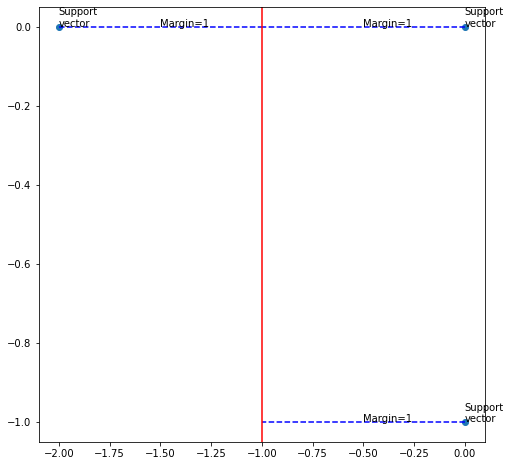

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x_1=[0,0,-2]
x_2=[0,-1,0]
plt.figure(figsize=(8,8))
plt.scatter(x_1,x_2)
for i in range(3):
    plt.annotate("Support\nvector", (x_1[i], x_2[i]))
    plt.plot([x_1[i], -1],[x_2[i],x_2[i]], 'blue', linestyle="--")
    plt.annotate("Margin=1", ((x_1[i]-1)/2, x_2[i]))
plt.axvline(x=-1,color='red')

## Q1 c)

In [68]:
from cvxopt import matrix, solvers
y=np.array([[-1.,-1.,1.]]).reshape(-1,1)
x=np.array([[x_1[0],x_2[0]], [x_1[1],x_2[1]], [x_1[2],x_2[2]]])

In [69]:
def create_matrixes(y_,x_):
    P_list=[]
    
    for col in range(x_.shape[0]):
        l=[]
        
        col_x=x_[col,:].reshape(-1,1)
        for row in range(x_.shape[0]):
            res=np.dot(x_[row,:].reshape(1,-1),col_x)[0,0]*y_[col,:]*y_[row,:]
            l.append(res[0])
        P_list.append(l)
        
    P=matrix(P_list)
    q=matrix([-1. for i in range(x_.shape[0])],(x_.shape[0],1))
    G=matrix(np.identity(x_.shape[0])*-1.)
    h=matrix([0. for i in range(x_.shape[0])],(x_.shape[0],1))
    A=matrix(y_,(1,x_.shape[0]))
    b=matrix([0.],(1,1))

    return P, q, G, h, A, b

In [70]:
P, q, G, h, A, b=create_matrixes(y,x)
solution=solvers.qp(P, q, G, h, A, b)
alpha_values=solution['x']
print(alpha_values)

     pcost       dcost       gap    pres   dres
 0: -4.4983e-01 -1.2111e+00  8e-01  6e-17  1e+00
 1: -4.8351e-01 -5.2212e-01  4e-02  6e-17  2e-01
 2: -4.9877e-01 -5.0271e-01  4e-03  4e-16  5e-17
 3: -4.9981e-01 -5.0021e-01  4e-04  1e-16  1e-16
 4: -4.9997e-01 -5.0003e-01  6e-05  1e-16  9e-17
 5: -5.0000e-01 -5.0000e-01  8e-06  2e-16  1e-16
 6: -5.0000e-01 -5.0000e-01  1e-06  6e-17  8e-17
 7: -5.0000e-01 -5.0000e-01  2e-07  1e-16  7e-17
Optimal solution found.
[ 5.00e-01]
[ 3.93e-04]
[ 5.00e-01]



In [71]:
def create_weight(alphas,x_,y_):
    weight=np.zeros((x_.shape[1],1))
    for i in range(x_.shape[0]):
        weight+=(y_[i,:]*alphas[[i][0]]*x_[i,:].reshape(-1,1)).reshape(-1,1)
    return weight

In [72]:
weight=create_weight(alpha_values,x,y)
print("Optimal weight vector:\n",weight)

Optimal weight vector:
 [[-1.00000001e+00]
 [ 3.93128191e-04]]


We can see that the weight values from QP and the weight values from Q1 b) are almost the same if we consider alpha values smaller than 1e-4 as 0 to calculate b using support vectors whose alpha values are greater than 0.

In [81]:
def create_bias(alphas,x_,y_):
    index=0
    for i in range(x_.shape[0]):
        # we choose a single x value whose alpha is greater than 0 so this means this x value is a support vector and this x value will be used to calculate the optimal bias
        if alphas[[i][0]]>1e-4:
            index=i
            break
    x_chosen=x_[index,:]
    b=y_[index,:]
    for i in range(x_.shape[0]):
        b-=y_[i,:]*alphas[[i][0]]*(np.dot(x_[i,:],x_chosen))

    return b[0]


In [82]:
bias=create_bias(alpha_values,x,y)
print("Optimal b value:\n",bias)

Optimal b value:
 -1.0


We can see that the calculated bias value from the QP solution is -1 which is the same value from Q1 b) which we manually solved.

## Q1 d)

In the below code, input and output values are read, PCA is applied (because in phase 1 we chose this approach to extract features) and then finally best 8 features are extracted from the PCA results. Their explanations can be found in the comments of this code.

In [83]:
from PIL import Image
import os
def getImagelist(path):
    return [int(f.split(".")[0]) for f in os.listdir(path)]

train_path="./phase1_files/3dshapes_train"
train_image_nums=getImagelist(train_path)
train_image_nums.sort()
x_train = np.array([np.array(Image.open(os.path.join(train_path,str(img)+".jpg")).convert('L')).flatten() for img in train_image_nums])
y_train=np.load('./phase1_files/orientations_train.npy').reshape(-1,1)
test_path="./phase1_files/3dshapes_test"
test_image_nums=getImagelist(test_path)
test_image_nums.sort()
x_test = np.array([np.array(Image.open(os.path.join(test_path,str(img)+".jpg")).convert('L')).flatten() for img in test_image_nums])
y_test=np.load('./phase1_files/orientations_test.npy').reshape(-1,1)

x_train_original = x_train.copy()
x_test_original = x_test.copy()
y_train_original = y_train.copy()
y_test_original = y_test.copy()


from sklearn.decomposition import PCA 
# The reason why we decided to use PCA in phase 1 is from the usage explanation of PCA in this soruce: 
# https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

# We extract only top 68 features with high variance from PCA because in Phase-1 we observed that 68 features covered 99 % of the input variance.
pca2 = PCA(n_components=68)
x_train_pca=pca2.fit_transform(x_train)
x_test_pca=pca2.transform(x_test)

# The below list of numbers are the most important features we observed in Phase-2 after we applied PCA that's why in the below code we are only extracting
# these features from train and test inputs to use them in the following questions.
indexes=[3,4,7,8,10,11,12,13]
x_train=x_train_pca[:,indexes]
x_test=x_test_pca[:,indexes]

We have created a normalization function and to use if before using cvxopt's qp solver. The algorithm raises some overflow and similiar kind of errors without normalization.

In [84]:
def normalize(data):
    mean=np.mean(data, axis=0).reshape(1,-1)
    std=np.std(data,axis=0).reshape(1,-1)
    data=(data-mean)/std
    return data,mean,std

In [85]:
x_train_normalized,mean,std=normalize(x_train)
x_test_normalized=(x_test-mean)/std

In [86]:
np.unique(y_train)

array([-30.        , -25.71428571, -21.42857143, -17.14285714,
       -12.85714286,  -8.57142857,  -4.28571429,   0.        ,
         4.28571429,   8.57142857,  12.85714286,  17.14285714,
        21.42857143,  25.71428571,  30.        ])

We have checked the classes and chose output 0 and output 30 to continue with binary classification. In the below code, only the inputs whose outputs are 0 or 30 are chosen. Output 30 is changed to 1 and output 0 is changed to -1.

In [87]:
idx_30=np.where(y_train==30.)[0]
idx_0=np.where(y_train==0.)[0]
orientation_30_y_train=y_train[idx_30]
orientation_0_y_train=y_train[idx_0]
orientation_0_x_train=x_train_normalized[idx_0,:]
orientation_30_x_train=x_train_normalized[idx_30,:]
x=np.concatenate((orientation_0_x_train, orientation_30_x_train), axis=0)
y=np.concatenate((orientation_0_y_train, orientation_30_y_train), axis=0)
y[y==30.]=1.
y[y==0.]=-1.


The challenges we faced: Initially, we have directly tried to use 3d shape dataset in cvxopt library. However, we obtained bias as NaN and weight values very small (approximately smaller than e-10) so we have decided to normalize our dataset column by column and than we managed to obtain the below results.

In [88]:
P, q, G, h, A, b=create_matrixes(y,x)
solution=solvers.qp(P, q, G, h, A, b)
alpha_values=solution['x']
weight=create_weight(alpha_values,x,y)
print("Optimal weight vector:\n",weight)
bias=create_bias(alpha_values,x,y)
print("Optimal b value:\n",bias)

     pcost       dcost       gap    pres   dres
 0: -6.5950e+01 -1.1509e+02  4e+03  7e+01  2e+00
 1: -3.0924e+01 -1.1339e+01  5e+02  8e+00  2e-01
 2: -2.9813e+00 -4.0888e+00  5e+01  7e-01  2e-02
 3: -7.1570e-01 -2.7239e+00  9e+00  1e-01  3e-03
 4: -7.4272e-01 -1.9556e+00  3e+00  3e-02  8e-04
 5: -9.3108e-01 -1.7501e+00  2e+00  1e-02  4e-04
 6: -1.0293e+00 -1.8424e+00  1e+00  6e-03  2e-04
 7: -1.4764e+00 -1.7286e+00  3e-01  1e-03  4e-05
 8: -1.5973e+00 -1.7066e+00  1e-01  6e-04  1e-05
 9: -1.6732e+00 -1.6919e+00  2e-02  2e-16  3e-15
10: -1.6909e+00 -1.6911e+00  2e-04  1e-15  3e-15
11: -1.6911e+00 -1.6911e+00  2e-06  4e-16  3e-15
12: -1.6911e+00 -1.6911e+00  2e-08  2e-15  3e-15
Optimal solution found.
Optimal weight vector:
 [[-1.23868738]
 [ 0.0765053 ]
 [ 0.27915641]
 [-0.15867443]
 [ 0.79278381]
 [ 1.02879509]
 [-0.22156184]
 [-0.05343846]]
Optimal b value:
 -1.6963863415987694


Now in the below code we are testing the performance our SVM algorithm whose weight and bias values are calculated with the help of above qp solver. First we only choose inputs in test dataset whose outputs are 0 or 30. We changed ouput 0 to -1 and output 30 to 1.

In [89]:
idx_30=np.where(y_test==30.)[0]
idx_0=np.where(y_test==0.)[0]
orientation_30_y_test=y_test[idx_30]
orientation_0_y_test=y_test[idx_0]
orientation_0_x_test=x_test_normalized[idx_0,:]
orientation_30_x_test=x_test_normalized[idx_30,:]
x=np.concatenate((orientation_0_x_test, orientation_30_x_test), axis=0)
y=np.concatenate((orientation_0_y_test, orientation_30_y_test), axis=0)
y[y==30.]=1.
y[y==0.]=-1.

In [90]:
result = np.sign(np.dot(x,weight)+bias)

In [91]:
def check_correctness(pred,gt):
    correct_predictions=0
    for i in range(len(pred)):
        if pred[i]==gt[i]:
            correct_predictions+=1
    print("Number of correctly classified predicitons for the test dataset is",correct_predictions)
    print("Accuracy: %", (correct_predictions/len(gt))*100)

This is the accuracy of our test after getting the weight vector from cvxopt solver.

In [92]:
check_correctness(result,y)

Number of correctly classified predicitons for the test dataset is 121
Accuracy: % 100.0


## Q1 e)

In [93]:
from sklearn import svm

y[y==-1.]=0
y[y==1.]=1
classifier = svm.SVC(C=np.inf)
classifier.fit(x, y.reshape(-1))
idx_30=np.where(y_test==30.)[0]
idx_0=np.where(y_test==0.)[0]

orientation_30_y_test=y_test[idx_30]
orientation_0_y_test=y_test[idx_0]
orientation_0_x_test=x_test_normalized[idx_0,:]
orientation_30_x_test=x_test_normalized[idx_30,:]
x_test_=np.concatenate((orientation_0_x_test, orientation_30_x_test), axis=0)
y_test_=np.concatenate((orientation_0_y_test, orientation_30_y_test), axis=0)

y_test_[y_test_==30.]=1

prediction=classifier.predict(x_test_)

In [94]:
check_correctness(prediction,y_test_)

Number of correctly classified predicitons for the test dataset is 121
Accuracy: % 100.0


For binary classification, SVC of scikit-learn which is the SVM classifier method, only takes input x and their corresponding y values. It implicitly creates matrixes that are explicitly created by the developer for the cvxopt QP solver. That's why it is easier to use scikit-learn's SVC method. This function executes a soft-margin SVM as deafult but since our problem is hard-margin, we can increase the C value to infinity so it becomes hard margin. This function applies kernel trick which is "Radial Basis Function" by default and basically uses squared Euclidean distance on the input and also allows the user to choose different kernel functions. The default kernel function was rbf and we used it as is. Scikit-learn's SVC function solves the dual problem by handling all the internal variable creations and the executions of the functions so it makes the usage of it easier than the qp.solver method of cvxopt. Also the run time of scikit-learn's function was less than cvxopt's qp solver's function.

## Q1 f)

Here the classes with real values are reorganized and labeled with integer values from 0 to 14

In [95]:
unique_y_values=np.unique(y_test)
vals=np.arange(0,len(unique_y_values))
y_test_=np.zeros(y_test.shape)
y_train_=np.zeros(y_train.shape)

for i in range(len(unique_y_values)):
    y_train_[y_train==unique_y_values[i]]=vals[i]
    y_test_[y_test==unique_y_values[i]]=vals[i]
y_train_=y_train_.flatten()
y_test_=y_test_.flatten()

In the below SVM classifier, we used the Radial Basis Function as kernel. We gave C as infinite because we want the hard margin solution.

In [96]:
clf = svm.SVC(C=np.inf,kernel="rbf")
clf.fit(x_train,y_train_)

prediction=clf.predict(x_test)
check_correctness(prediction,y_test_)

Number of correctly classified predicitons for the test dataset is 985
Accuracy: % 98.5


In the below code we have used LinearSVC which make use of linear kernel function 

In [97]:
clf = svm.LinearSVC(max_iter=10000)
clf.fit(x_train_normalized,y_train_)
prediction=clf.predict(x_test_normalized)
check_correctness(prediction,y_test_)

Number of correctly classified predicitons for the test dataset is 834
Accuracy: % 83.39999999999999


We have observed from the results that the SVC function with RBF kernel gave better results.

## Q1 g)

In the Phase-1, we have decided to use PCA to extract the most important features from the 3d_shapes dataset. So, we all used PCA and the features that we have extracted before in all steps of Phase-2 and also previous steps of Phase-2 since we are asked to use the features that we have extracted from the previous phases. We have decided to use PCA in Phase-1 since we found it convenient to our dataset and problem comparing to other methods that we have tested in Phase-1. And we have decided the number of features as 68 in Phase-1 to represent 99% of the data. And in Phase-2 we get the 8 most important features after we applied PCA, we use these features of the PCA applied features in the experiments in Phase-3.

In [98]:
clf2 = svm.SVC(C=np.inf,kernel="rbf")
clf2.fit(x_train_original,y_train_)
prediction=clf2.predict(x_test_original)
check_correctness(prediction,y_test_)

Number of correctly classified predicitons for the test dataset is 1000
Accuracy: % 100.0


To make a comparion in the code above, we have tested the 3d shapes data without any feature extraction, we got the 100% accuracy by directly applying SVM on 4096 features with hard margin and rbf kernel. But comparing the runtimes, it takes more than a minute to compute this value but with the 8 feature version it takes seconds and gave 98.5% accuracy. 

## Q1 h)

In Phase-1, we have applied Linear Regression on 3d shapes data, and we get the Mean Square Error, 0.06542296461734323, on 1000 test samples as the outcome. It is not directly comparable with the following accuracy values since it is a regression problem but the following ones are classification problems. To solve a classification problem like this with discrete target values, Linear Regression is not the optimal choice

In Phase-2, we have applied Logistic Regression and Naive Bayes on 3d shapes dataset. We applied a multiclass logistic regressin by using cross entropy loss function and get the accuracy results as 97.8 % in the version without using any regularization. And for the Naive Bayes, We got 97.7 % test accuracy from the library function. Even though Naive Bayes gives a high accuracy score, because of it is a generative model which relies on the given data, it might not be as generalizable as other discriminative classifiers.

In Phase-3, for the multiclass classification we have tried svm function from library as the classifier in part f and got the classification accuracy as 98.5 %  on test data. We did not get the best possible result because we only use most important features that we got in Phase-2. In (g) part of the question we have directly applied SVM on the raw data with 4096 features and got the result as 100% accuracy. We can infer from the results that when we increase the number of features used, we get more accuracy but it doesn't increase to much. Also, considering the runtimes, using less but representative features would be a more robust option.


Both Logistic Regression, Naive Bayes and Support Vector Machines give similiar kind of high test accuracy for the given dataset. Since also using their built-in functions are easy, we reccomend using one of them for such a classification problem. 

## Q2 a)

In the below code, 500 random numbers between 0 and 1 are generated to randomly choose one of the 4 distributions. If the random number is smaller than 0.25 the first distribution is chosen so the distribution's mean $\mu=(0,1)$ is saved, if the random is between 0.25 and 0.5 then the second distributions is chosen and its $\mu=(1,0)$ is saved, if the random is between 0.5 and 0.75 then the third distribution is chosen and its $\mu=(-1,0)$ is saved and finally if the random is bigger than 0.75 then the fourth distribution is chosen and its $\mu=(0,-1)$ is saved. The means are stored in the means array. This array will be used to create the points sampled from these distributions.

In [25]:
tmp=np.random.rand(500)
means=np.zeros((500,2))
for i in range(500):
    el=tmp[i]
    if el<0.25:
        means[i,:]=[0,1]
    elif el>=0.25 and el<0.5:
        means[i,:]=[1,0]
    elif el>=0.5 and el<0.75:
        means[i,:]=[-1,0]
    else:
        means[i,:]=[0,-1]

In the below code, 500 points with diemsnion 2 are sampled using numpy's multivariate normal distribution function. This function takes a mean array and a covariance matrix. Each value in the mean array corresponds to the mean of that dimension of the point and each diagonal cell of the covariance matrix corresponds to the variance of that dimension. Mean array and the covariance matrix are put into this multivariate gaussian distribution probability function to find the sampled point: $\frac{1}{(2\pi)^{\frac{d}{2}}|\sum|^{\frac{1}{2}}}exp(-\frac{1}{2}(x-\mu)^{T}\sum^{-1}(x-\mu))$ where here d=2, $\mu$ is an array of shape 2 and $\sum$ is a matrix of shape 2x2.

In [26]:
# since all samples have the same covariance matrixes we can use the below code to get the eigenvalues and eigenvectors for each sample
identity=np.identity(2)
colors=[]
X=np.zeros((500,2))
for i in range(500):
    X[i]=np.random.multivariate_normal(means[i,:], identity)
    if (means[i,:]==[0,1]).all():
        colors.append("r")
    elif (means[i,:]==[1,0]).all():
        colors.append("b")
    elif (means[i,:]==[-1,0]).all():
        colors.append("yellow")
    else:
        colors.append("green")

In the below code we see the scattered 500 points sampled from 4 different distributions which are labeled with different colors.

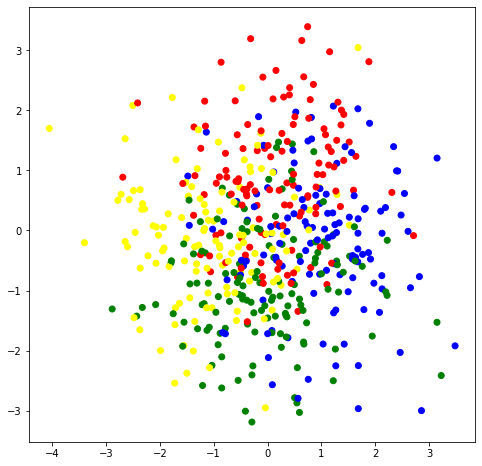

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=colors)

## Q2 b)

In [28]:
indexes=np.random.randint(0,500,size=(1,4))[0]
centroids=[X[indexes[i],:] for i in range(4)]
labels=[1,2,3,4]
old_centroids=centroids.copy()
begin=True
while begin or (not np.array_equal(np.array(old_centroids),np.array(centroids))):
    begin=False
    old_centroids=centroids.copy()
    cluster_1=np.zeros((1,2))
    cluster_2=np.zeros((1,2))
    cluster_3=np.zeros((1,2))
    cluster_4=np.zeros((1,2))
    el_1=[]
    el_2=[]
    el_3=[]
    el_4=[]
    for j in range(500):
        vals=[]
        vals.append((np.linalg.norm(X[j]-centroids[0],2),labels[0]))
        vals.append((np.linalg.norm(X[j]-centroids[1],2),labels[1]))
        vals.append((np.linalg.norm(X[j]-centroids[2],2),labels[2]))
        vals.append((np.linalg.norm(X[j]-centroids[3],2),labels[3]))
        
        vals.sort(key=lambda k:k[0])
        label=vals[0][1]
        if label==1:
            cluster_1+=X[j]
            el_1.append(X[j])
        elif label==2:
            cluster_2+=X[j]
            el_2.append(X[j])
        elif label==3:
            cluster_3+=X[j]
            el_3.append(X[j])
        else:
            cluster_4+=X[j]
            el_4.append(X[j])
    centroids[0]=(cluster_1/len(el_1))[0]
    centroids[1]=(cluster_2/len(el_2))[0]
    centroids[2]=(cluster_3/len(el_3))[0]
    centroids[3]=(cluster_4/len(el_4))[0]

In [29]:
centroids

[array([-0.34575286, -1.26684489]),
 array([ 1.52882038, -0.4956903 ]),
 array([-1.33947731,  0.28904969]),
 array([0.55938394, 1.31593335])]

Here we can see the optimal centroids. The centroids are very close to the means of 4 distributions.

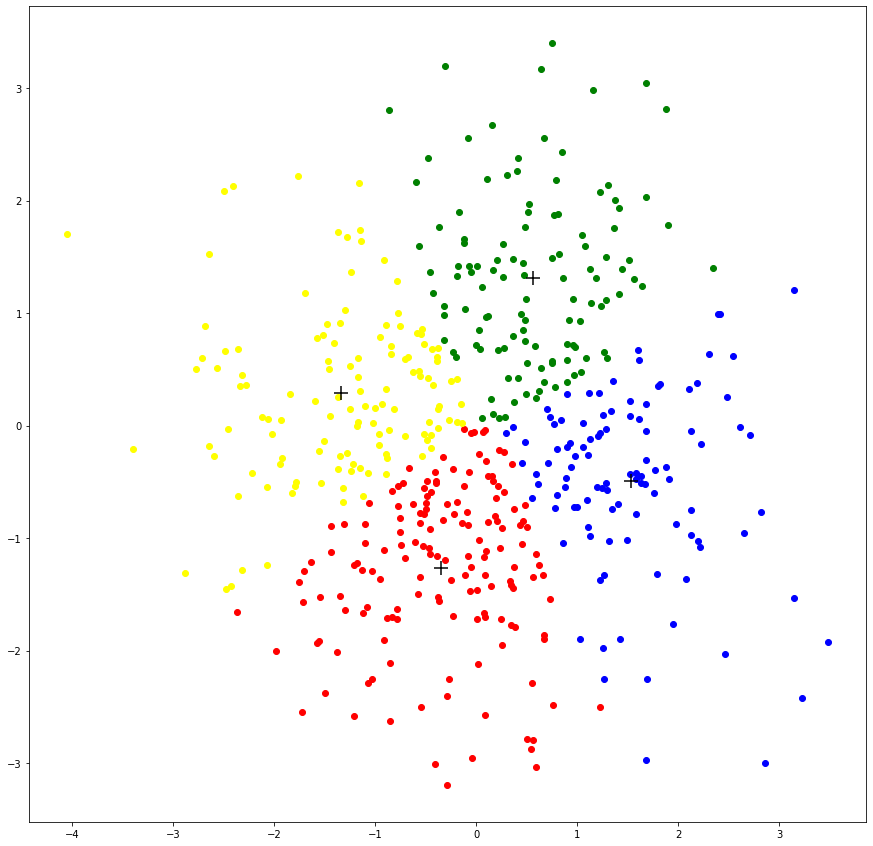

In [30]:
cluster_1_x=np.array(el_1)
cluster_2_x=np.array(el_2)
cluster_3_x=np.array(el_3)
cluster_4_x=np.array(el_4)

plt.figure(figsize=(15,15))
plt.scatter(cluster_1_x[:,0],cluster_1_x[:,1],c="r")
plt.scatter(cluster_2_x[:,0],cluster_2_x[:,1],c="b")
plt.scatter(cluster_3_x[:,0],cluster_3_x[:,1],c="yellow")
plt.scatter(cluster_4_x[:,0],cluster_4_x[:,1],c="green")
for i in range(4):
    plt.scatter(centroids[i][0],centroids[i][1],200,marker="+",c="black")

Centroids are denoted with black + symbols and different clusters are represent with different colors.
The k-means algorithm was able to correctly classify points from 4 different distributions with means $(0,1)$, $(0,-1)$, $(-1,0)$ and $(1,0)$ because the centroids of points which we printed in the above code are close to these distribution means. 